In [4]:
# Setting up libraries
#import tweepy           # To consume Twitter's API
#from tweepy import OAuthHandler
import pandas as pd     # To handle data
import numpy as np      # For number computing
import re
from textblob import TextBlob # To help with textual analysis
import json


In [5]:
twitter_datadf=pd.read_csv('BringFamiliesTogether.csv')
twitter_datadf

,Unnamed: 0,created_at,favorite_count,favorited,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,possibly_sensitive,retweet_count,retweeted,source,text,truncated,name,screen_name,location,description
0,0,2018-06-25 21:45:40,0.0,False,1.011365e+18,9.069182e+17,NaN,NaN,NaN,NaN,...,0.0,0.0,False,"<a href=""http://twitter.com/#!/download/ipad"" ...","Trump is STILL holding 2,300 kids as hostages ...",True,Dubs Hart,DubsHart,Cumbria,Sharing in the hope of a better World #RJCOB
1,1,2018-06-25 21:45:39,0.0,False,1.011365e+18,9.385330e+17,NaN,NaN,NaN,NaN,...,0.0,0.0,False,"<a href=""http://resist.bot"" rel=""nofollow"">RB ...",Here’s an open letter from Cheryle in West Che...,False,Resistbot Open Letters,openletterbot,United States,Real letters delivered to Congress and state g...
2,2,2018-06-25 21:44:40,0.0,False,1.011365e+18,1.741491e+07,NaN,NaN,NaN,NaN,...,0.0,0.0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",The takeaway: 41 percent of Americans are hear...,False,Patrick White,whitepatrick,"iPhone: 41.120196,-95.915053",I'm a writer/producer and musician based in Om...
3,3,2018-06-25 21:44:24,0.0,False,1.011365e+18,9.385330e+17,NaN,NaN,NaN,NaN,...,0.0,0.0,False,"<a href=""http://resist.bot"" rel=""nofollow"">RB ...",Here’s an open letter from Cheryle in West Che...,False,Resistbot Open Letters,openletterbot,United States,Real letters delivered to Congress and state g...
4,4,2018-06-25 21:44:13,0.0,False,1.011364e+18,1.374219e+07,NaN,NaN,NaN,NaN,...,0.0,0.0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",We don't have to sit around feeling helpless. ...,True,SandraL #AbolishICE,SandraL,NaN,"Geek mom, singer, lover of British TV. I post ..."
5,5,2018-06-25 21:44:13,0.0,False,1.011364e+18,9.048501e+17,SenCortezMasto,1.011362e+18,1.011362e+18,8.113136e+17,...,NaN,0.0,False,"<a href=""http://twitter.com/download/iphone"" r...",@SenCortezMasto They didn’t know that we’re fi...,True,Bella Soul,fashionfunfemme,NaN,Kindness is NOT Weakness!
6,6,2018-06-25 21:44:02,0.0,False,1.011364e+18,1.728928e+09,JoyAnnReid,1.011335e+18,1.011335e+18,4.969813e+07,...,NaN,0.0,False,"<a href=""http://twitter.com/download/iphone"" r...",@JoyAnnReid We have the ability to find missin...,True,Stacy Jo Gunder,StacyGunder,Texas...North Texas,NaN
7,7,2018-06-25 21:44:02,0.0,False,1.011364e+18,1.000053e+18,NaN,NaN,NaN,NaN,...,0.0,0.0,False,"<a href=""http://twitter.com/download/android"" ...",That DNA testing may be necessary to reunite f...,True,Anna-Michelle Grace,misfitpastor,NaN,"Minister, advocate & theologian. I question, I..."
8,8,2018-06-25 21:44:00,0.0,False,1.011364e+18,8.884819e+17,NaN,NaN,NaN,NaN,...,0.0,0.0,False,"<a href=""https://about.twitter.com/products/tw...",It is immoral to tear toddlers from their moth...,True,Blue Future,BlueFutureNow,"Washington, DC",a youth-led movement connecting young people t...
9,9,2018-06-25 21:43:39,0.0,False,1.011364e+18,1.730428e+09,NaN,NaN,NaN,NaN,...,NaN,0.0,False,"<a href=""http://twitter.com/download/iphone"" r...","Just saw one lone protester in Fort Mill, SC o...",False,Bonnybrook Manor,bonnybrookmanor,"South Carolina, USA",Worked in corp. America for 30 yrs. Left it fo...


In [6]:
#Cleaning column Tweets by replacing #,,,:,@user etc by ''
#Replaced each special character one by one just to keep track of changes. The code 
#twitter_datadf['Tweets'] = twitter_datadf['Tweets'].apply(lambda x: re.sub('[!@#$:).;,?&_]', '', x.lower())) combines all of these
#special characters in one and setting everything to lowercase 
twitter_datadf['text'] = twitter_datadf.text.str.replace('\'','') #Remove the single quote
twitter_datadf['text'] = twitter_datadf.text.str.replace('\,','') #Remove the comma
twitter_datadf['text'] = twitter_datadf.text.str.replace('\@([a-zA-Z0-9]{1,15})','') #Remove the @ mark
twitter_datadf['text'] = twitter_datadf.text.str.replace('\"','') #Remove the double quote
twitter_datadf['text'] = twitter_datadf.text.str.replace('\t','') #Remove the tab character
twitter_datadf['text'] = twitter_datadf.text.str.replace('RT','') #Remove the RT character
twitter_datadf['text'] = twitter_datadf.text.str.replace('\:','') #Remove the colon
twitter_datadf['text'] = twitter_datadf.text.str.replace('\#','') #Remove the hashtag
twitter_datadf['text'] = twitter_datadf.text.str.replace(r'http\S+','') #Remove the url
#twitter_datadf['text'] = twitter_datadf['text'].apply(lambda x: re.sub('[!@#$:).;,?&_]', '', x.lower())) #Removing all addiitonal special characters
#twitter_datadf['Tweets'] = twitter_datadf.Tweets.str.lower() #Setting all words to lowercase
#twitter_datadf['Tweets'] = twitter_datadf['Tweets'].apply(lambda x: re.sub(u'('
#    u'\ud83c[\udf00-\udfff]|'
#    u'\ud83d[\udc00-\ude4f\ude80-\udeff]|'
#  u'[\u2600-\u26FF\u2700-\u27BF])+', '') #Had errors with these codes - the aim was was remove emoticons
twitter_datadf['text'] = twitter_datadf.text.str.replace(u'['u'\U0001F300-\U0001F64F,'u'\U0001F680-\U0001F6FF]','')


# In[ ]:

#Splitting each tweet as a string into words
twitter_datadf['text'].str.split()


0       [Trump, is, STILL, holding, 2300, kids, as, ho...
1       [Here’s, an, open, letter, from, Cheryle, in, ...
2       [The, takeaway, 41, percent, of, Americans, ar...
3       [Here’s, an, open, letter, from, Cheryle, in, ...
4       [We, dont, have, to, sit, around, feeling, hel...
5       [They, didn’t, know, that, we’re, fighting, fo...
6       [We, have, the, ability, to, find, missing, sh...
7       [That, DNA, testing, may, be, necessary, to, r...
8       [It, is, immoral, to, tear, toddlers, from, th...
9       [Just, saw, one, lone, protester, in, Fort, Mi...
10                               [FamiliesBelongTogether]
11      [Resign, FamiliesBelongTogether, RememberPuert...
12      [FamiliesBelongTogether, immigration, TakeAKne...
13      [immigration, FamiliesBelongTogether, U.S., mu...
14      [Here’s, an, open, letter, from, Juan, in, For...
15      [Hey, let, school, you., ICE, reports, 99%, in...
16      [Rev, proclaims, that, FamiliesBelongTogether,...
17      [Famil

In [7]:
!pip install vaderSentiment
!python -m pip install --upgrade pip

notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


Requirement already up-to-date: pip in c:\users\user\anaconda3\anac\lib\site-packages (10.0.1)


notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [9]:
twitter_datadf['text'][0]

'Trump is STILL holding 2300 kids as hostages in his sick political game! I just donated to help get these kids law… '

In [10]:
twitter_datadf['text'][1]

'Here’s an open letter from Cheryle in West Chester PA to  FamiliesBelongTogether '

In [11]:
#print_sentiment_scores(twitter_datadf['text'][1])
analyser.polarity_scores(twitter_datadf['text'][1])
#analyser.polarity_scores(twitter_datadf['text'][1])['neu']

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [13]:
text = []
id_str = []
name = []
screen_name = []
location = []
description = []
retweet_count= []
created_at = []
created_at_date = []
created_at_time = []
compound = []
#pos = []
#neu = []
#neg = []

for i in range(0, len(twitter_datadf)-1):
    text.append(twitter_datadf['text'][i])
    id_str.append(twitter_datadf['id_str'][i])
    name.append(twitter_datadf['name'][i])
    screen_name.append(twitter_datadf['screen_name'][i])
    location.append(twitter_datadf['location'][i])
    description.append(twitter_datadf['description'][i])
    retweet_count.append(twitter_datadf['retweet_count'][i])
    created_at.append(twitter_datadf['created_at'][i])
    created_at_date.append(str(twitter_datadf['created_at'][i])[0:10])
    created_at_time.append(str(twitter_datadf['created_at'][i])[11:13])
    #compound.append(sentiment(str(twitter_datadf['text'][i])))
    compound.append(analyser.polarity_scores(str(twitter_datadf['text'][i]))['compound'])
    #pos.append(analyser.polarity_scores(twitter_datadf['text'][i])['pos'])
    #neu.append(analyser.polarity_scores(twitter_datadf['text'][i])['neu'])
    #neg.append(analyser.polarity_scores(twitter_datadf['text'][i])['neg'])


In [20]:
#put the columns back together
twitter_df = pd.DataFrame({'text' : text,
                          'id_str' : id_str,
                          'name' : name,
                          'screen_name' : screen_name,
                          'location' : location,
                          'description' : description,
                          'retweet_count' : retweet_count,
                          'created_at' : created_at,
                          'created_at_date' : created_at_date,
                          'created_at_time' : created_at_time,
                          'compound': compound})

twitter_df = twitter_df[['text','id_str','name','screen_name','location','description','retweet_count','created_at','created_at_date','created_at_time','compound']]
twitter_df

,text,id_str,name,screen_name,location,description,retweet_count,created_at,created_at_date,created_at_time,compound
0,Trump is STILL holding 2300 kids as hostages i...,9.069182e+17,Dubs Hart,DubsHart,Cumbria,Sharing in the hope of a better World #RJCOB,0.0,2018-06-25 21:45:40,2018-06-25,21,-0.2244
1,Here’s an open letter from Cheryle in West Che...,9.385330e+17,Resistbot Open Letters,openletterbot,United States,Real letters delivered to Congress and state g...,0.0,2018-06-25 21:45:39,2018-06-25,21,0.0000
2,The takeaway 41 percent of Americans are heart...,1.741491e+07,Patrick White,whitepatrick,"iPhone: 41.120196,-95.915053",I'm a writer/producer and musician based in Om...,0.0,2018-06-25 21:44:40,2018-06-25,21,-0.7717
3,Here’s an open letter from Cheryle in West Che...,9.385330e+17,Resistbot Open Letters,openletterbot,United States,Real letters delivered to Congress and state g...,0.0,2018-06-25 21:44:24,2018-06-25,21,0.0000
4,We dont have to sit around feeling helpless. W...,1.374219e+07,SandraL #AbolishICE,SandraL,NaN,"Geek mom, singer, lover of British TV. I post ...",0.0,2018-06-25 21:44:13,2018-06-25,21,-0.3612
5,They didn’t know that we’re fighting for them...,9.048501e+17,Bella Soul,fashionfunfemme,NaN,Kindness is NOT Weakness!,0.0,2018-06-25 21:44:13,2018-06-25,21,0.0000
6,We have the ability to find missing ships los...,1.728928e+09,Stacy Jo Gunder,StacyGunder,Texas...North Texas,NaN,0.0,2018-06-25 21:44:02,2018-06-25,21,-0.2960
7,That DNA testing may be necessary to reunite f...,1.000053e+18,Anna-Michelle Grace,misfitpastor,NaN,"Minister, advocate & theologian. I question, I...",0.0,2018-06-25 21:44:02,2018-06-25,21,-0.5106
8,It is immoral to tear toddlers from their moth...,8.884819e+17,Blue Future,BlueFutureNow,"Washington, DC",a youth-led movement connecting young people t...,0.0,2018-06-25 21:44:00,2018-06-25,21,-0.7371
9,Just saw one lone protester in Fort Mill SC on...,1.730428e+09,Bonnybrook Manor,bonnybrookmanor,"South Carolina, USA",Worked in corp. America for 30 yrs. Left it fo...,0.0,2018-06-25 21:43:39,2018-06-25,21,0.1027


In [23]:
#let's examine overall % of positive, negative, and neutral tweets

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

perc_pos=(len(twitter_df[(twitter_df['compound']>0)])/len(twitter_df))*100
perc_pos
perc_neut=(len(twitter_df[(twitter_df['compound']==0)])/len(twitter_df))*100
perc_neut
perc_neg=(len(twitter_df[(twitter_df['compound']<0)])/len(twitter_df))*100
perc_neg

26.0747850429914

47.03059388122375

26.89462107578484

In [24]:
#now let's add some tags to analyze trends by topic
twitter_df['protests'] = np.where(twitter_df['text'].str.contains('(?:^|\W)(protest|demonstration|strike|rally|march)(?:$|\W)',
    flags = re.IGNORECASE), 1, 0)
twitter_df['children'] = np.where(twitter_df['text'].str.contains('(?:^|\W)(child|girl|boy|infant|baby|babies|mother|kid|toddler|school)(?:$|\W)',
    flags = re.IGNORECASE), 1, 0)
twitter_df['government'] = np.where(twitter_df['text'].str.contains('(?:^|\W)(politic|government|election|bill|trump|donald|tax)(?:$|\W)',
    flags = re.IGNORECASE), 1, 0)
twitter_df['immigration'] = np.where(twitter_df['text'].str.contains('(?:^|\W)(immigrant|immigration|immigrate|move|moving|travel|separat|fly)(?:$|\W)',
    flags = re.IGNORECASE), 1, 0)
twitter_df

C:\Users\User\Anaconda3\anac\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\anac\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """
C:\Users\User\Anaconda3\anac\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
C:\Users\User\Anaconda3\anac\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,text,id_str,name,screen_name,location,description,retweet_count,created_at,created_at_date,created_at_time,compound,protests,children,government,immigration
0,Trump is STILL holding 2300 kids as hostages i...,9.069182e+17,Dubs Hart,DubsHart,Cumbria,Sharing in the hope of a better World #RJCOB,0.0,2018-06-25 21:45:40,2018-06-25,21,-0.2244,0,0,1,0
1,Here’s an open letter from Cheryle in West Che...,9.385330e+17,Resistbot Open Letters,openletterbot,United States,Real letters delivered to Congress and state g...,0.0,2018-06-25 21:45:39,2018-06-25,21,0.0000,0,0,0,0
2,The takeaway 41 percent of Americans are heart...,1.741491e+07,Patrick White,whitepatrick,"iPhone: 41.120196,-95.915053",I'm a writer/producer and musician based in Om...,0.0,2018-06-25 21:44:40,2018-06-25,21,-0.7717,0,0,0,0
3,Here’s an open letter from Cheryle in West Che...,9.385330e+17,Resistbot Open Letters,openletterbot,United States,Real letters delivered to Congress and state g...,0.0,2018-06-25 21:44:24,2018-06-25,21,0.0000,0,0,0,0
4,We dont have to sit around feeling helpless. W...,1.374219e+07,SandraL #AbolishICE,SandraL,NaN,"Geek mom, singer, lover of British TV. I post ...",0.0,2018-06-25 21:44:13,2018-06-25,21,-0.3612,0,0,0,0
5,They didn’t know that we’re fighting for them...,9.048501e+17,Bella Soul,fashionfunfemme,NaN,Kindness is NOT Weakness!,0.0,2018-06-25 21:44:13,2018-06-25,21,0.0000,0,0,0,0
6,We have the ability to find missing ships los...,1.728928e+09,Stacy Jo Gunder,StacyGunder,Texas...North Texas,NaN,0.0,2018-06-25 21:44:02,2018-06-25,21,-0.2960,0,0,0,0
7,That DNA testing may be necessary to reunite f...,1.000053e+18,Anna-Michelle Grace,misfitpastor,NaN,"Minister, advocate & theologian. I question, I...",0.0,2018-06-25 21:44:02,2018-06-25,21,-0.5106,0,0,1,0
8,It is immoral to tear toddlers from their moth...,8.884819e+17,Blue Future,BlueFutureNow,"Washington, DC",a youth-led movement connecting young people t...,0.0,2018-06-25 21:44:00,2018-06-25,21,-0.7371,0,0,0,0
9,Just saw one lone protester in Fort Mill SC on...,1.730428e+09,Bonnybrook Manor,bonnybrookmanor,"South Carolina, USA",Worked in corp. America for 30 yrs. Left it fo...,0.0,2018-06-25 21:43:39,2018-06-25,21,0.1027,0,0,0,0


In [25]:
#let's see how many tweets fall in each of the defined categories of protests, children, government, immigration
num_protests=twitter_df['protests'].sum()
num_protests
num_children=twitter_df['children'].sum()
num_children
num_government=twitter_df['government'].sum()
num_government
num_immigration=twitter_df['immigration'].sum()
num_immigration

#try some more classifications based on analysis needed.

210

227

452

192

In [26]:
#for each topic, are the tweets more positive or negative
print('protests')
perc_pos=(len(twitter_df[(twitter_df['compound']>0)&twitter_df['protests']==1])/len(twitter_df[(twitter_df['protests']==1)]))*100
perc_pos
perc_neut=(len(twitter_df[(twitter_df['compound']==0)&twitter_df['protests']==1])/len(twitter_df[(twitter_df['protests']==1)]))*100
perc_neut
perc_neg=(len(twitter_df[(twitter_df['compound']<0)&twitter_df['protests']==1])/len(twitter_df[(twitter_df['protests']==1)]))*100
perc_neg

print('children')
perc_pos=(len(twitter_df[(twitter_df['compound']>0)&twitter_df['children']==1])/len(twitter_df[(twitter_df['children']==1)]))*100
perc_pos
perc_neut=(len(twitter_df[(twitter_df['compound']==0)&twitter_df['children']==1])/len(twitter_df[(twitter_df['children']==1)]))*100
perc_neut
perc_neg=(len(twitter_df[(twitter_df['compound']<0)&twitter_df['children']==1])/len(twitter_df[(twitter_df['children']==1)]))*100
perc_neg

print('government')
perc_pos=(len(twitter_df[(twitter_df['compound']>0)&twitter_df['government']==1])/len(twitter_df[(twitter_df['government']==1)]))*100
perc_pos
perc_neut=(len(twitter_df[(twitter_df['compound']==0)&twitter_df['government']==1])/len(twitter_df[(twitter_df['government']==1)]))*100
perc_neut
perc_neg=(len(twitter_df[(twitter_df['compound']<0)&twitter_df['government']==1])/len(twitter_df[(twitter_df['government']==1)]))*100
perc_neg

print('immigration')
perc_pos=(len(twitter_df[(twitter_df['compound']>0)&twitter_df['immigration']==1])/len(twitter_df[(twitter_df['immigration']==1)]))*100
perc_pos
perc_neut=(len(twitter_df[(twitter_df['compound']==0)&twitter_df['immigration']==1])/len(twitter_df[(twitter_df['immigration']==1)]))*100
perc_neut
perc_neg=(len(twitter_df[(twitter_df['compound']<0)&twitter_df['immigration']==1])/len(twitter_df[(twitter_df['immigration']==1)]))*100
perc_neg

protests


42.38095238095238

33.80952380952381

23.809523809523807

children


29.515418502202646

29.955947136563875

40.52863436123348

government


17.035398230088493

27.654867256637168

55.309734513274336

immigration


34.375

26.5625

39.0625

In [27]:
#let's examine the most positive and the most negative topics

#first, what makes the protest topic positive?


import nltk
tweets_protests_pos=twitter_df[(twitter_df['compound']>0)&twitter_df['protests']==1]['text']

tweets_filtered=[]
for (tweet) in tweets_protests_pos:
    words = [w.lower() for w in tweet.split() if len(w)>=3]
    tweets_filtered.append((words))
#tweets_filtered

tweets_filtered_words=[]
for (i) in tweets_filtered:
    for k in range(0,len(i)):
        tweets_filtered_words.append(i[k])
#tweets_filtered_words

tweets_filtered_words_freq=nltk.FreqDist(tweets_filtered_words)
#tweets_filtered_words_freq

tweets_filtered_words_ordered=sorted(tweets_filtered_words_freq.items(), key = lambda item: item[1], reverse=True)
tweets_filtered_words_ordered


# we can tell from this info that there is a peaceful rally on Saturday June 30th that is to be held to support immigrant families.


[('the', 57),
 ('rally', 38),
 ('for', 34),
 ('join', 31),
 ('familiesbelongtogether', 31),
 ('march', 29),
 ('june', 28),
 ('this', 26),
 ('families', 18),
 ('saturday', 17),
 ('and', 16),
 ('protest', 13),
 ('30th', 11),
 ('&amp;', 10),
 ('our', 9),
 ('belong', 9),
 ('support', 8),
 ('you', 8),
 ('immigrant', 7),
 ('together', 7),
 ('please', 7),
 ('separation', 6),
 ('solidarity', 6),
 ('with', 6),
 ('all', 5),
 ('immigration', 5),
 ('near', 5),
 ('are', 5),
 ('find', 4),
 ('event', 4),
 ('state', 4),
 ('was', 4),
 ('from', 4),
 ('coming', 4),
 ('family', 4),
 ('policy', 4),
 ('san', 4),
 ('great', 4),
 ('many', 4),
 ('will', 4),
 ('out', 4),
 ('denver', 4),
 ('sign', 3),
 ('one', 3),
 ('march!', 3),
 ('proud', 3),
 ('familiesbelongtogether…', 3),
 ('your', 3),
 ('30th!', 3),
 ('after', 3),
 ('inspired', 3),
 ('can', 3),
 ('partners', 3),
 ('community', 3),
 ('saturdays', 3),
 ('immigrants', 3),
 ('end', 3),
 ('help', 3),
 ('thank', 3),
 ('jun', 3),
 ('there', 3),
 ('hope', 3),
 ('f

In [28]:
#Now let's examine what's negative about the topic of government ?

import nltk
tweets_government_pos=twitter_df[(twitter_df['compound']<0)&twitter_df['government']==1]['text']

tweets_filtered=[]
for (tweet) in tweets_government_pos:
    words = [w.lower() for w in tweet.split() if len(w)>=3]
    tweets_filtered.append((words))
#tweets_filtered

tweets_filtered_words=[]
for (i) in tweets_filtered:
    for k in range(0,len(i)):
        tweets_filtered_words.append(i[k])
#tweets_filtered_words

tweets_filtered_words_freq=nltk.FreqDist(tweets_filtered_words)
#tweets_filtered_words_freq

tweets_filtered_words_ordered=sorted(tweets_filtered_words_freq.items(), key = lambda item: item[1], reverse=True)
tweets_filtered_words_ordered


#We can see here that what's driving the negativity in the government topic is that trump is holding children as political hostages. The words 'sick' and 'help' are also mentioned. 


[('kids', 212),
 ('trump', 208),
 ('his', 113),
 ('just', 110),
 ('these', 105),
 ('still', 104),
 ('holding', 104),
 ('get', 104),
 ('political', 102),
 ('2300', 101),
 ('hostages', 101),
 ('sick', 101),
 ('help', 101),
 ('game!', 100),
 ('donated', 96),
 ('law…', 94),
 ('the', 94),
 ('and', 38),
 ('that', 31),
 ('their', 27),
 ('from', 26),
 ('children', 26),
 ('this', 23),
 ('familiesbelongtogether', 21),
 ('are', 21),
 ('you', 21),
 ('&amp;', 20),
 ('stop', 16),
 ('administration', 13),
 ('our', 13),
 ('government', 13),
 ('what', 12),
 ('signed', 12),
 ('for', 12),
 ('with', 12),
 ('not', 11),
 ('petition', 10),
 ('separating', 10),
 ('about', 10),
 ('demanding', 9),
 ('immigrant', 9),
 ('donald', 9),
 ('parents.', 8),
 ('sig…', 8),
 ('being', 8),
 ('they', 8),
 ('your', 8),
 ('families', 7),
 ('should', 7),
 ('all', 7),
 ('against', 7),
 ('trump’s', 7),
 ('will', 6),
 ('border', 6),
 ('cruel', 6),
 ('has', 6),
 ('parents', 6),
 ('babies', 6),
 ('wants', 6),
 ('reunite', 5),
 ('vo

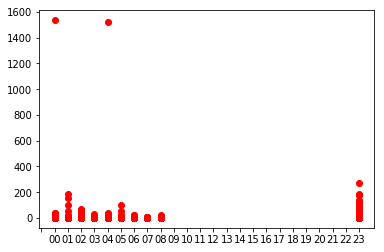

In [29]:
#let's plot the hour of the post against how many retweets to see the optimal time of tweeting to reach others
import matplotlib.pyplot as plt
plt.plot(twitter_df['created_at_time'], twitter_df['retweet_count'], 'ro')
plt.show()
#it looks like, from this sample, the best time to tweet if you want to reach more people is from 11pm to 1am

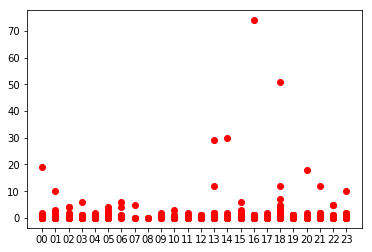

In [30]:
# might be affected by timezones, so look at just US.
twitter_df_us=twitter_df[twitter_df.location=='United States']
plt.plot(twitter_df_us['created_at_time'], twitter_df_us['retweet_count'], 'ro')
plt.show()

# looks like there's a spike around lunch hour (1-2 pm) and around after work 

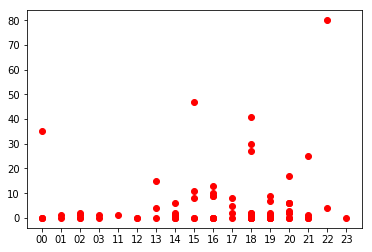

In [32]:
#let's look at 1 timezone.. washington, dc
twitter_df_wa=twitter_df[twitter_df.location=='Washington, DC']
plt.plot(twitter_df_wa['created_at_time'], twitter_df_wa['retweet_count'], 'ro')
plt.show()

In [96]:
#check count of tweets per geography
twitter_df['location'].value_counts()

United States                                      697
Washington, DC                                      89
California, USA                                     62
USA                                                 62
New York, NY                                        47
Boston, MA                                          41
Florida, USA                                        40
Earth                                               40
Brooklyn, NY                                        37
Los Angeles, CA                                     37
New York                                            31
Ohio, USA                                           28
Texas, USA                                          27
New Jersey, USA                                     27
California                                          27
Chicago, IL                                         24
Washington, D.C.                                    23
New York City                                       21
Los Angele